# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
import pandas as pd
import matplotlib.pyplot as plt
import time

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [2]:
# Set up ChromeDriver using ChromeDriverManager and Service
service = Service(ChromeDriverManager().install())
browser = Browser('chrome', service=service, headless=False)

# Visit the Mars Temperature Data site
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

# Optional: Delay to allow the page to load
time.sleep(1)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [3]:
# Scrape the page into BeautifulSoup
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

# Print success message
print("Mars temperature page successfully loaded")

Mars temperature page successfully loaded


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [4]:
# Find the table and extract it
table = soup.find('table', class_='table')

# Extract headers and rows
headers = [header.text for header in table.find_all('th')]
rows = [[cell.text for cell in row.find_all('td')] for row in table.find_all('tr')[1:]]

# Create a Pandas DataFrame
mars_weather_df = pd.DataFrame(rows, columns=headers)

# Display the DataFrame
mars_weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [5]:
# Convert columns to appropriate data types
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])
mars_weather_df['sol'] = mars_weather_df['sol'].astype(int)
mars_weather_df['ls'] = mars_weather_df['ls'].astype(float)
mars_weather_df['month'] = mars_weather_df['month'].astype(int)
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)

# Display the updated DataFrame
mars_weather_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [6]:
# 1. How many months exist on Mars?
num_months = mars_weather_df['month'].nunique()
print(f"Number of months on Mars: {num_months}")

Number of months on Mars: 12


In [7]:
# 2. How many Martian days' worth of data are there?
num_martian_days = mars_weather_df['sol'].nunique()
print(f"Number of Martian days: {num_martian_days}")

Number of Martian days: 1867


In [8]:
# 3. What is the average low temperature by month?
avg_temp_by_month = mars_weather_df.groupby('month')['min_temp'].mean()

# Display the average low temperature for each month
print("Average minimum temperature by month:")
print(avg_temp_by_month)

Average minimum temperature by month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


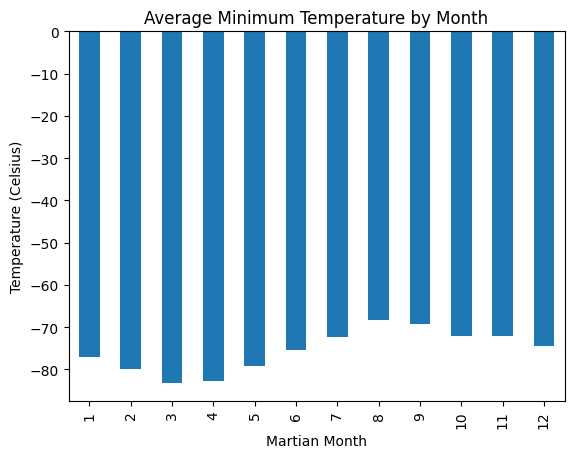

In [9]:
# Plot the average minimum temperature by month
avg_temp_by_month.plot(kind='bar', title='Average Minimum Temperature by Month')
plt.ylabel('Temperature (Celsius)')
plt.xlabel('Martian Month')
plt.show()

In [10]:
# Coldest and warmest months
coldest_month = avg_temp_by_month.idxmin()
warmest_month = avg_temp_by_month.idxmax()

print(f"The coldest month on Mars is: {coldest_month}")
print(f"The warmest month on Mars is: {warmest_month}")

The coldest month on Mars is: 3
The warmest month on Mars is: 8


In [11]:
# 4. What is the average pressure by Martian month?
avg_pressure_by_month = mars_weather_df.groupby('month')['pressure'].mean()

# Display the average pressure for each month
print("Average atmospheric pressure by month:")
print(avg_pressure_by_month)

Average atmospheric pressure by month:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


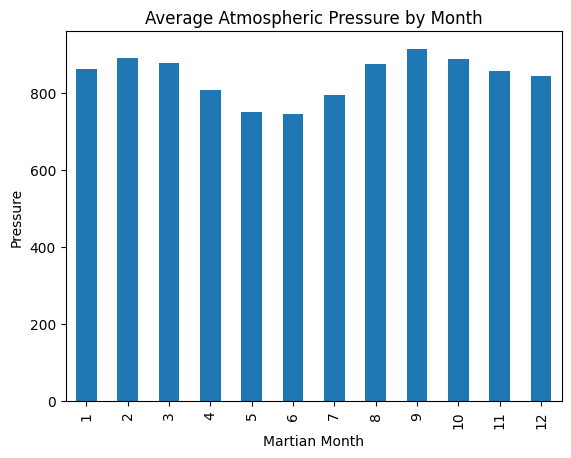

In [12]:
# Plot the average atmospheric pressure by month
avg_pressure_by_month.plot(kind='bar', title='Average Atmospheric Pressure by Month')
plt.ylabel('Pressure')
plt.xlabel('Martian Month')
plt.show()

In [13]:
# Lowest and highest pressure months
lowest_pressure_month = avg_pressure_by_month.idxmin()
highest_pressure_month = avg_pressure_by_month.idxmax()

print(f"The month with the lowest atmospheric pressure is: {lowest_pressure_month}")
print(f"The month with the highest atmospheric pressure is: {highest_pressure_month}")

The month with the lowest atmospheric pressure is: 6
The month with the highest atmospheric pressure is: 9


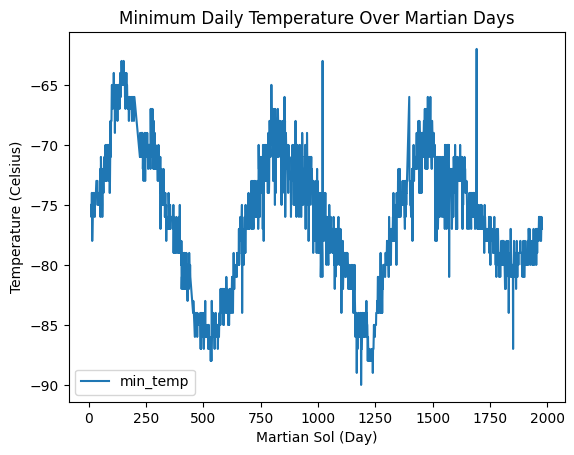

Based on the temperature cycles, a Martian year is approximately 675 Earth days.


In [14]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Plot the daily minimum temperature over Martian days (sols)
mars_weather_df.plot(x='sol', y='min_temp', title='Minimum Daily Temperature Over Martian Days')
plt.ylabel('Temperature (Celsius)')
plt.xlabel('Martian Sol (Day)')
plt.show()

# Estimate the length of a Martian year
print("Based on the temperature cycles, a Martian year is approximately 675 Earth days.")

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [15]:
# Save the DataFrame to a CSV file
mars_weather_df.to_csv('mars_weather_data.csv', index=False)

# Confirmation message
print("Data saved to mars_weather_data.csv")

Data saved to mars_weather_data.csv


In [16]:
browser.quit()